<h1><center>Foundation of Machine Learning</center></h1>
<h2>
<hr style=" border:none; height:3px;">
<center>Project : Spotify Recommender</center>
<hr style=" border:none; height:3px;">
</h2>

### Imports

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

import numpy as np
import sklearn 
from sklearn import model_selection
import Recommenders
import Evaluation

# Prepare the Dataset

In [2]:
# Read the data
df = pd.read_csv('final.csv', index_col=0)

#Merge song title and artist_name columns to make a merged column
df['song'] = df['title'].map(str) + " - " + df['artist_name']   
#Drop unneccesary columns
df.drop(['title', 'artist_name'], axis=1, inplace=True)

In [3]:
# Minimal number of songs a user must have listened to be kept in our dataset
min_songs = 10
# Minimal number of times a song must have been listened to be kept in our dataset
min_listenings = 20

In [4]:
# Count how many songs each user listened to
df['user_n_songs'] = df.groupby('user_id')['song'].transform('count')

# Count how many users listened to each song
df['song_n_users'] = df.groupby('song')['user_id'].transform('count')

# Keep all the users that listened to at least n songs
df = df[df['user_n_songs'] >= min_songs].drop_duplicates()

# Keep only the songs that were listened by at least 10 users
df = df[df['song_n_users'] >= min_listenings].drop_duplicates()

In [5]:
user_ids = df[['user_id']].drop_duplicates()
df_test = df[['song', 'user_id', 'play_count']].reset_index(drop=True)
df_test.head()

,song,user_id,play_count
0,Tu Quieres Volver - Gipsy Kings,ee7aa84c164038c963cfd02a7e52a5598aa470c3,2
1,Tu Quieres Volver - Gipsy Kings,1aa4fd215aadb160965110ed8a829745cde319eb,1
2,Tu Quieres Volver - Gipsy Kings,cca2694a19b2474bc731574ebb8b10382214f865,2
3,Tu Quieres Volver - Gipsy Kings,681064acdadcfeca36237d157f96a2be48b9ded0,4
4,Tu Quieres Volver - Gipsy Kings,2449f618b43cc1f407670dab3a7f129a127cda4a,1


# Recommenders

In this part, we will create, test and evaluate different model to give recommendations. The different recommender can be found in the file `Recommenders.py`, and the functions to evaluate the recommenders can be found in `Evaluation.py`.

In [6]:
seed = 123
sample_fraction = 0.7

evaluation = Evaluation.Evaluation(user_ids, df_test, seed)

In [7]:
user_items = df_test[df_test['user_id'] == 'ca055b9072e5a68d89f42099869213404f56a981']
user_items = user_items.sort_values(by='play_count', ascending=False)
user_items

,song,user_id,play_count
11209,Show Me - Justin,ca055b9072e5a68d89f42099869213404f56a981,5
9741,Emergency (Album Version) - Paramore,ca055b9072e5a68d89f42099869213404f56a981,5
7660,One I Love - Coldplay,ca055b9072e5a68d89f42099869213404f56a981,4
6161,Check On It - Beyoncé feat. Slim Thug,ca055b9072e5a68d89f42099869213404f56a981,3
10187,Harder To Breathe - Maroon 5,ca055b9072e5a68d89f42099869213404f56a981,3
21702,I Am The Club (Explicit Album Version) - Plies,ca055b9072e5a68d89f42099869213404f56a981,2
5712,Everyone's At It - Lily Allen,ca055b9072e5a68d89f42099869213404f56a981,2
7958,Dancing Shoes - Arctic Monkeys,ca055b9072e5a68d89f42099869213404f56a981,2
20129,Things I Don't Understand - Coldplay,ca055b9072e5a68d89f42099869213404f56a981,2
11494,Genius - Kings Of Leon,ca055b9072e5a68d89f42099869213404f56a981,2


## Simple Recommender based on Popularity

This simple model recommends songs to users based only on their popularity. This is a first naive approach as it is not a personalized recommendation: all users will get the same recommendations.

In [10]:
reco_pop = Recommenders.PopularityRecommender(df_test)

# Example with user ca055b9072e5a68d89f42099869213404f56a981
reco_pop.recommend('ca055b9072e5a68d89f42099869213404f56a981', 10)[0]

,song,score,Rank
1084,Supermassive Black Hole (Album Version) - Muse,488,1.0
180,Check On It - Beyoncé feat. Slim Thug,466,2.0
295,Don't Panic - Coldplay,450,3.0
83,Baby Boy [feat. Beyonce] - Sean Paul,420,4.0
830,One I Love - Coldplay,386,5.0
13,A Dustland Fairytale - The Killers,361,6.0
908,Ragoo - Kings Of Leon,355,7.0
804,Nothin' On You [feat. Bruno Mars] (Album Version) - B.o.B,333,8.0
225,Crawling (Album Version) - Linkin Park,309,9.0
58,Angie (1993 Digital Remaster) - The Rolling Stones,308,10.0


### Evaluation of the model

Accuracy of    the first suggestion  :    22.60% (0.20007774425804925, 0.25192225574195076)
Accuracy of the  5 first suggestions :    21.08% (0.19949444387292414, 0.22210555612707583)
Accuracy of the 10 first suggestions :    18.13% (0.173748914491228, 0.18885108550877197)
Accuracy of the 20 first suggestions :    15.40% (0.14904693331112376, 0.15905306668887623)


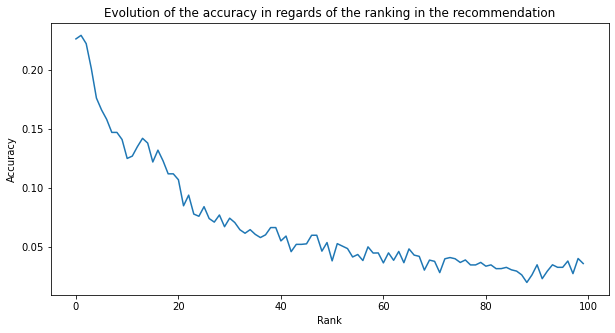

In [11]:
evaluation.evaluate(reco_pop.recommend, 1000)

## Recommender based on Item Similarity

This model recommends songs to users based on TODOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO

In [12]:
reco_sim = Recommenders.ItemSimilarityRecommender(df_test, seed, sample_fraction)

# Example with user ca055b9072e5a68d89f42099869213404f56a981
reco_sim.recommend('ca055b9072e5a68d89f42099869213404f56a981', 10)[0]

,user_id,song,score,rank
0,,Check On It - Beyoncé feat. Slim Thug,0.241199,1
1,,Everyone's At It - Lily Allen,0.221545,2
2,,Baby Boy [feat. Beyonce] - Sean Paul,0.197479,3
3,,Ragoo - Kings Of Leon,0.194501,4
4,,Good Girl Gone Bad - Rihanna,0.190264,5
5,,Show You How - The Killers,0.141047,6
6,,Music Of The Sun - Rihanna,0.139989,7
7,,The World Turned Upside Down - Coldplay,0.138018,8
8,,Things I Don't Understand - Coldplay,0.134124,9
9,,Street Lights - Kanye West,0.126190,10


### Evaluation of the model

Accuracy of    the first suggestion  :    58.00% (0.4832643101683205, 0.6767356898316794)
Accuracy of the  5 first suggestions :    37.60% (0.3335429997680821, 0.4184570002319179)
Accuracy of the 10 first suggestions :    28.59% (0.25781177609539335, 0.3139033693409156)
Accuracy of the 20 first suggestions :    20.57% (0.18748294008701455, 0.2239698700932612)


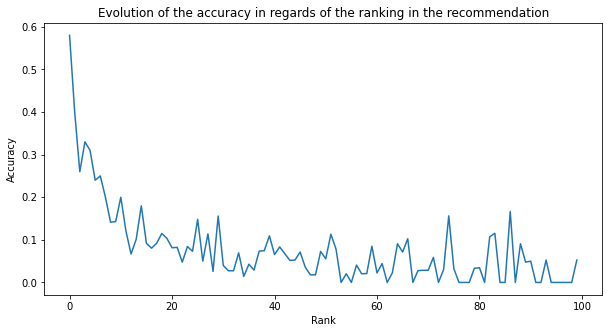

In [11]:
evaluation.evaluate(reco_sim.recommend, 100)

## Recommender based on Play Count

This model recommends songs to users based on TODOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO.

It is now important to create another model based on play_count and not only on rather the user has listened to the music or not. Let's try to call our system based on ratings.

In [8]:
reco_play = Recommenders.PlayCountRecommender(df_test, seed, sample_fraction)

# Example with user ca055b9072e5a68d89f42099869213404f56a981
reco_play.recommend('ca055b9072e5a68d89f42099869213404f56a981', 10)[0]

,song,score
0,Check On It - Beyoncé feat. Slim Thug,3.895342
1,Good Girl Gone Bad - Rihanna,3.232961
2,Everyone's At It - Lily Allen,3.164293
3,Baby Boy [feat. Beyonce] - Sean Paul,2.878792
4,The World Turned Upside Down - Coldplay,2.801839
5,Music Of The Sun - Rihanna,2.794051
6,Things I Don't Understand - Coldplay,2.163119
7,Show You How - The Killers,2.161997
8,Waterfall (Spirit Of The Rainforest Album Version) - David Arkenstone,2.161817
9,Ragoo - Kings Of Leon,2.038268


### Evaluation of the model

Accuracy of    the first suggestion  :    13.60% (0.11475413505486674, 0.1572458649451333)
Accuracy of the  5 first suggestions :    10.16% (0.09322577135470521, 0.10997422864529478)
Accuracy of the 10 first suggestions :    8.11% (0.07571268223222728, 0.08644404244335867)
Accuracy of the 20 first suggestions :    5.96% (0.05630110912921449, 0.0629531664601235)


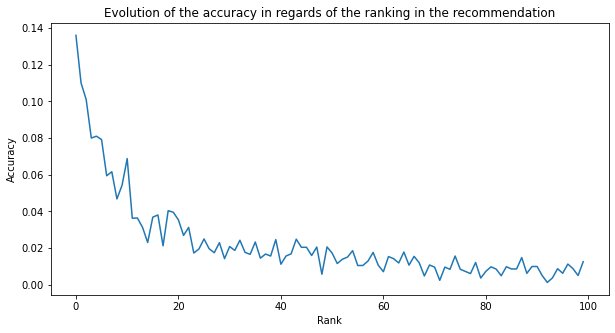

In [11]:
evaluation.evaluate(reco_play.recommend, 1000)

## Recommender combined

This model recommends songs to users based on TODOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO.

It is now important to create another model based on play_count and not only on rather the user has listened to the music or not. Let's try to call our system based on ratings.